<Figure size 1160x840 with 0 Axes>

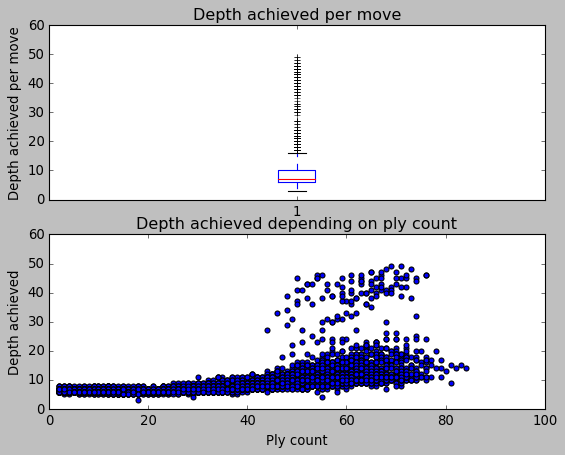

In [68]:
import csv
import matplotlib.pyplot as plt

input_file = 'depth,ply_count.csv'

with open(input_file, 'r') as depth_ply_data:
    stats = list(csv.reader(depth_ply_data, quoting=csv.QUOTE_NONNUMERIC))
    

# depth, ply_count  \           \
# depth, ply_count   \           \
# depth, ply_count    \           \
# .                    \           \
# .               This is a turn    \
# .                    /             \
# .                   /               \
# .                  /                 \
# depth, ply_count  /                   \
#                                        \
# depth, ply_count  \                     \
# depth, ply_count   \                     \
# depth, ply_count    \                     \
# .                    \                     \
# .               This is a turn              \
# .                    /                       \
# .                   /                         \
# .                  /
# depth, ply_count  /                      This is a match
# .
# .                                             /
# .                                            /
# .                                           /
# .                                          /
# .                                         /
#                                          /
# depth, ply_count  \                     /
# depth, ply_count   \                   /
# depth, ply_count    \                 /
# .                    \               /
# .               This is a turn      /
# .                    /             /
# .                   /             /
# .                  /             /
# depth, ply_count  /             /
#                                /

# and matches is a list of match lists

matches = []
match = []
turn = []

# append the first entry in the first turn
# so we can compare current entry to previous entry in the for loop
turn.append(stats[0])

for i in range(1, len(stats)):
    if stats[i][0] < stats[i-1][0]:
        # we have come to a new turn
        match.append(turn) # append the last turn to a match list
        turn = [] # initialize an empty turn list for upcoming stats entries
        turn.append(stats[i]) # append the current stats entry to the new turn list
        if stats[i][1] < stats[i-1][1]:
            # we have come to a new match
            matches.append(match) # add the last match to matches list
            match = [] # initialize an empty match list for upcoming turn entries
    else:
        turn.append(stats[i]) # append current stats entry to the current turn list
else: 
    # just (ab)using the else keyword :), 
    # gives a sense we are still in the for loop and using this else block
    # to complete stuff which is part of the whole operation done in the loop
    # append the last turn to the last match
    match.append(turn)
    # and append the last match to the matches list
    matches.append(match)

# for match in matches:
#     print(match)
#     print('*' * 50)

# Let's plot
plt.figure(figsize=(14.5, 10.5))
plt.style.use('classic')

fig = plt.figure()

# Depth per move - boxplot

max_depth_per_move = []
for match in matches:
    for turn in match:
        # the last entry in each turn list is the one
        # with the max depth achieved for the turn
        max_depth_per_move.append(turn[-1][0])

plt.subplot(2, 1, 1)
plt.boxplot(max_depth_per_move)
plt.axis([0, 2, 0, 60])

plt.title('Depth achieved per move')
plt.ylabel('Depth achieved per move')

# Depth achieved depending on ply - scatter plot
depth = []
ply = []

for match in matches:
    for turn in match:
        # the last entry in each turn list is the one
        # with the max depth achieved for the turn
        depth.append(turn[-1][0])
        ply.append(turn[-1][1])

plt.subplot(2, 1, 2)
plt.scatter(ply, depth)
plt.title('Depth achieved depending on ply count')
plt.xlabel('Ply count')
plt.ylabel('Depth achieved')
plt.axis([0, 100, 0, 60])


fig.savefig('baseline_analysis.png')
plt.show()